In [1]:
# Utilice este espacio para escribir el código.
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt

In [2]:
evaluaciones = pd.read_csv('Evaluaciones_Agropecuarias_Municipales_EVA.csv')
evaluaciones

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO


In [3]:
evaluaciones2=evaluaciones[['CÓD. MUN.', 'CULTIVO']]

In [4]:
pivot = np.round(pd.pivot_table(evaluaciones2, index='CÓD. MUN.',
                                columns='CULTIVO', aggfunc= len, fill_value=0))

In [5]:
pivot.reset_index(inplace=True)

In [6]:
pivot

CULTIVO,CÓD. MUN.,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,AJI,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,5001,0,0,0,0,0,12,0,0,0,...,0,0,0,0,0,0,12,24,0,0
1,5002,0,0,0,0,0,12,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,5004,0,0,0,0,0,7,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,5021,0,0,0,0,0,4,0,0,0,...,0,0,0,0,0,0,10,0,0,0
4,5030,0,0,0,0,0,10,0,0,0,...,0,0,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1100,97666,0,0,0,0,0,0,0,0,1,...,0,2,0,1,0,0,10,0,0,2
1101,99001,0,0,0,0,0,0,0,11,0,...,0,0,0,0,0,0,12,0,0,0
1102,99524,0,0,0,0,0,5,0,7,0,...,0,0,0,0,0,0,15,0,0,0
1103,99624,0,0,0,0,0,0,0,16,0,...,0,0,0,0,0,0,12,0,0,0


In [7]:
pivot['DPTOMPIO']=pivot['CÓD. MUN.']

In [8]:
municipios=gpd.read_file("MunicipiosVeredas19MB.json")

In [9]:
municipios['DPTOMPIO']=municipios[['DPTOMPIO']].apply(pd.to_numeric)
municipios

,DPTOMPIO,DPTO_CCDGO,MPIO_CCDGO,MPIO_CNMBR,MPIO_CCNCT,geometry
0,5001,05,001,MEDELLÍN,05001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351..."
1,5002,05,002,ABEJORRAL,05002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026..."
2,5004,05,004,ABRIAQUÍ,05004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877..."
3,5021,05,021,ALEJANDRÍA,05021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469..."
4,5030,05,030,AMAGÁ,05030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216..."
...,...,...,...,...,...,...
1116,97889,97,889,YAVARATÉ,97889,"POLYGON ((-69.99653 0.54682, -69.99598 0.54751..."
1117,99001,99,001,PUERTO CARREÑO,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6..."
1118,99524,99,524,LA PRIMAVERA,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472..."
1119,99624,99,624,SANTA ROSALÍA,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669..."


In [10]:
municipios2=municipios[['DPTOMPIO','geometry']]
municipios2

,DPTOMPIO,geometry
0,5001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351..."
1,5002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026..."
2,5004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877..."
3,5021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469..."
4,5030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216..."
...,...,...
1116,97889,"POLYGON ((-69.99653 0.54682, -69.99598 0.54751..."
1117,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6..."
1118,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472..."
1119,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669..."


In [11]:
pivot = pivot.astype({'CÓD. MUN.':'int'})
municipios3=pd.merge(municipios2,pivot, left_on='DPTOMPIO', right_on='DPTOMPIO')
municipios3

,DPTOMPIO,geometry,CÓD. MUN.,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,5001,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351...",5001,0,0,0,0,0,12,0,...,0,0,0,0,0,0,12,24,0,0
1,5002,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026...",5002,0,0,0,0,0,12,0,...,0,0,0,0,0,0,0,0,0,0
2,5004,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877...",5004,0,0,0,0,0,7,0,...,0,0,0,0,0,0,0,0,0,0
3,5021,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469...",5021,0,0,0,0,0,4,0,...,0,0,0,0,0,0,10,0,0,0
4,5030,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216...",5030,0,0,0,0,0,10,0,...,0,0,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,97666,"POLYGON ((-69.42882 -1.07654, -69.42842 -1.074...",97666,0,0,0,0,0,0,0,...,0,2,0,1,0,0,10,0,0,2
1100,99001,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6...",99001,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0
1101,99524,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472...",99524,0,0,0,0,0,5,0,...,0,0,0,0,0,0,15,0,0,0
1102,99624,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669...",99624,0,0,0,0,0,0,0,...,0,0,0,0,0,0,12,0,0,0


In [12]:
municipios3 = municipios3.iloc[: , 1:]
municipios3

,geometry,CÓD. MUN.,ACELGA,ACHICORIA,ACHIOTE,ACHIRA,AGRAZ,AGUACATE,AGUAJE,AHUYAMA,...,ULLUCO,UMARI,UVA,UVA CAIMARONA,VAINILLA,YACON,YUCA,ZANAHORIA,ZAPOTE,ÑAME
0,"POLYGON ((-75.66873 6.37318, -75.67084 6.37351...",5001,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,12,24,0,0
1,"POLYGON ((-75.41645 5.90108, -75.41728 5.90026...",5002,0,0,0,0,0,12,0,0,...,0,0,0,0,0,0,0,0,0,0
2,"POLYGON ((-76.01161 6.64726, -76.01490 6.64877...",5004,0,0,0,0,0,7,0,0,...,0,0,0,0,0,0,0,0,0,0
3,"POLYGON ((-74.98189 6.38306, -74.98448 6.38469...",5021,0,0,0,0,0,4,0,0,...,0,0,0,0,0,0,10,0,0,0
4,"POLYGON ((-75.67424 6.08270, -75.67677 6.08216...",5030,0,0,0,0,0,10,0,0,...,0,0,0,0,0,0,12,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1099,"POLYGON ((-69.42882 -1.07654, -69.42842 -1.074...",97666,0,0,0,0,0,0,0,0,...,0,2,0,1,0,0,10,0,0,2
1100,"MULTIPOLYGON (((-68.69207 6.13972, -68.69368 6...",99001,0,0,0,0,0,0,0,11,...,0,0,0,0,0,0,12,0,0,0
1101,"POLYGON ((-68.80859 6.17041, -68.81325 6.17472...",99524,0,0,0,0,0,5,0,7,...,0,0,0,0,0,0,15,0,0,0
1102,"POLYGON ((-70.64082 5.39812, -70.64262 5.39669...",99624,0,0,0,0,0,0,0,16,...,0,0,0,0,0,0,12,0,0,0


In [13]:
from sklearn import metrics
metrics.pairwise_distances(
    municipios3.loc[:, ~municipios3.columns.isin(['geometry', 'CÓD. MUN.'])].head()
).round(4)

array([[  0.    , 103.0776, 106.4049, 101.7349, 106.3297],
       [103.0776,   0.    ,  33.7787,  40.5586,  49.2646],
       [106.4049,  33.7787,   0.    ,  27.1293,  43.6119],
       [101.7349,  40.5586,  27.1293,   0.    ,  44.1814],
       [106.3297,  49.2646,  43.6119,  44.1814,   0.    ]])

In [14]:
from sklearn.preprocessing import robust_scale
db_scaled = robust_scale(municipios3.loc[:, ~municipios3.columns.isin(['geometry', 'CÓD. MUN.'])])

In [15]:
# Initialize KMeans instance
from sklearn.cluster import KMeans

In [16]:
kmeans = KMeans(n_clusters=10)

In [17]:
# Set the seed for reproducibility
np.random.seed(1234)
# Run K-Means algorithm
k10cls = kmeans.fit(db_scaled)

C:\Users\alexy\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


In [18]:
k10cls.labels_[:5]

array([8, 1, 1, 1, 1])

In [19]:
municipios3["k10cls"] = k10cls.labels_

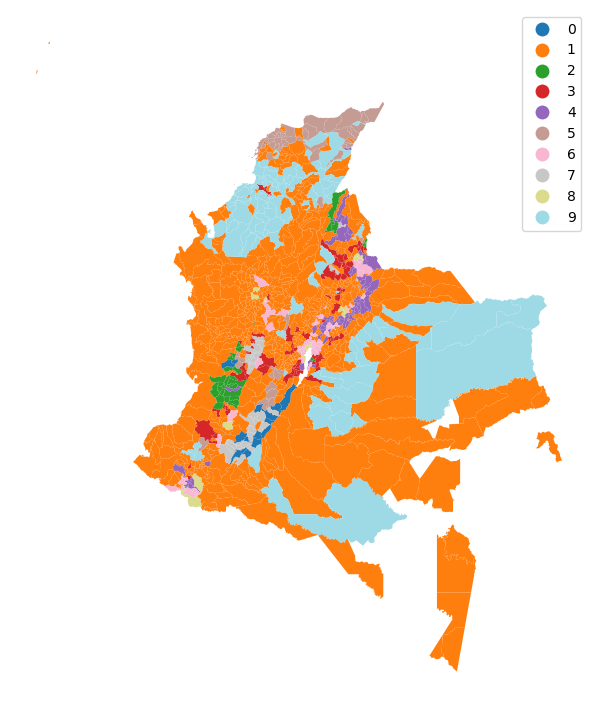

In [20]:
f, ax = plt.subplots(1, figsize=(9, 9))
# Plot unique values choropleth including
# a legend and with no boundary lines
municipios3.plot(
    column="k10cls", categorical=True, legend=True, cmap='tab20',linewidth=0, ax=ax
)
# Remove axis
ax.set_axis_off()
# Display the map
plt.show()

In [21]:
evaluaciones3 = pd.merge(evaluaciones,municipios3[['CÓD. MUN.','k10cls']],on='CÓD. MUN.', how='left')
evaluaciones3

,CÓD. \nDEP.,DEPARTAMENTO,CÓD. MUN.,MUNICIPIO,GRUPO \nDE CULTIVO,SUBGRUPO \nDE CULTIVO,CULTIVO,DESAGREGACIÓN REGIONAL Y/O SISTEMA PRODUCTIVO,AÑO,PERIODO,Área Sembrada\n(ha),Área Cosechada\n(ha),Producción\n(t),Rendimiento\n(t/ha),ESTADO FISICO PRODUCCION,NOMBRE \nCIENTIFICO,CICLO DE CULTIVO,k10cls
0,15,BOYACA,15114,BUSBANZA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,1,1,1.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,4.0
1,25,CUNDINAMARCA,25754,SOACHA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,82,80,1440,18.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,8.0
2,25,CUNDINAMARCA,25214,COTA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,2,2,26,17.33,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,8.0
3,54,NORTE DE SANTANDER,54405,LOS PATIOS,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,3,3,48,16.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,2.0
4,54,NORTE DE SANTANDER,54518,PAMPLONA,HORTALIZAS,ACELGA,ACELGA,ACELGA,2006,2006B,1,1,5,10.00,FRUTO FRESCO,BETA VULGARIS,TRANSITORIO,8.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
206063,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,20,18,180,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,1.0
206064,25,CUNDINAMARCA,25524,PANDI,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2017,2017B,2,2,8,5.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,3.0
206065,25,CUNDINAMARCA,25436,MANTA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,15,15,150,10.00,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,1.0
206066,25,CUNDINAMARCA,25807,TIBIRITA,HORTALIZAS,CALABACIN,CALABACIN,ZUCCHINI,2018,2018A,6,6,50,8.27,HORTALIZA FRESCA,CUCURBITA PEPO,TRANSITORIO,3.0


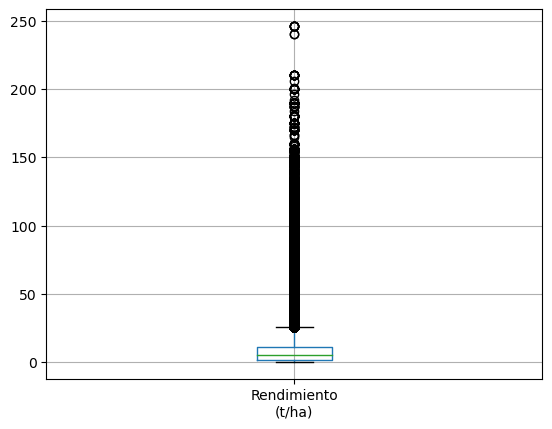

In [22]:
evaluaciones3=evaluaciones3.dropna(subset='Rendimiento\n(t/ha)')
evaluaciones3.boxplot(column='Rendimiento\n(t/ha)', return_type='axes');

C:\Users\alexy\AppData\Local\Temp\ipykernel_18872\2361166495.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  evaluaciones3['Rendimiento\n(t/ha)'] = evaluaciones3[evaluaciones3['Rendimiento\n(t/ha)'] < 25]['Rendimiento\n(t/ha)']


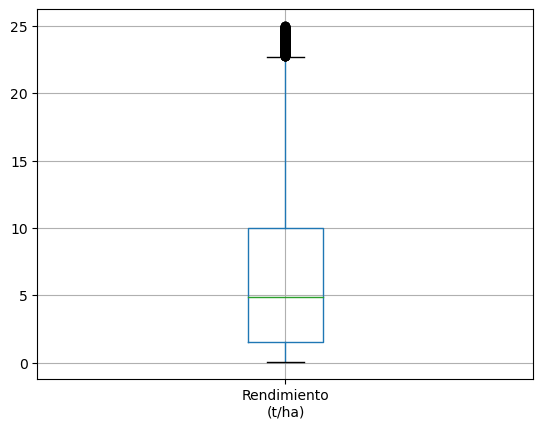

In [23]:
evaluaciones3['Rendimiento\n(t/ha)'] = evaluaciones3[evaluaciones3['Rendimiento\n(t/ha)'] < 25]['Rendimiento\n(t/ha)']
evaluaciones3.boxplot(column='Rendimiento\n(t/ha)', return_type='axes');

In [24]:
evaluaciones3=evaluaciones3.dropna(subset='Rendimiento\n(t/ha)')
evaluaciones3=evaluaciones3.dropna(subset='AÑO')
evaluaciones3=evaluaciones3.dropna(subset='CULTIVO')
evaluaciones3=evaluaciones3.dropna(subset='k10cls')

In [25]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
Y=evaluaciones3['Rendimiento\n(t/ha)']
Y

0          1.00
1         18.00
2         17.33
3         16.00
4         10.00
          ...  
206063    10.00
206064     5.00
206065    10.00
206066     8.27
206067     5.00
Name: Rendimiento\n(t/ha), Length: 188189, dtype: float64

In [26]:
X=evaluaciones3[['AÑO','CULTIVO','k10cls']]
X = X.replace(',','', regex=True)
X

,AÑO,CULTIVO,k10cls
0,2006,ACELGA,4.0
1,2006,ACELGA,8.0
2,2006,ACELGA,8.0
3,2006,ACELGA,2.0
4,2006,ACELGA,8.0
...,...,...,...
206063,2017,CALABACIN,1.0
206064,2017,CALABACIN,3.0
206065,2018,CALABACIN,1.0
206066,2018,CALABACIN,3.0


In [27]:
from sklearn.preprocessing import LabelEncoder
# Create arrary of categorial variables to be encoded
categorical_cols = ['CULTIVO']

le = LabelEncoder()
# apply label encoder on categorical feature columns
X[categorical_cols] = X[categorical_cols].apply(lambda col: le.fit_transform(col))
X

,AÑO,CULTIVO,k10cls
0,2006,0,4.0
1,2006,0,8.0
2,2006,0,8.0
3,2006,0,2.0
4,2006,0,8.0
...,...,...,...
206063,2017,44,1.0
206064,2017,44,3.0
206065,2018,44,1.0
206066,2018,44,3.0


In [75]:
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [85]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.25, random_state=13
)

# Definir los parámetros para el SVR
svr_params = {
    'C': 1.0,             # Regularizacion del modelo
    'kernel': 'rbf',      # Funcion Kernel
    'gamma': 'auto',      # Influencia que tiene un solo ejemplo de entrenamiento
    'epsilon': 0.5,       # Magnitud permitida del margen del modelo
    'shrinking': True,    # Heuristica de reduccion de vectores
    'tol': 0.01,          # Criterio de tolerancia para la convergencia del algoritmo
    'cache_size': 200,    # Memoria cache usada por el kernel
    'max_iter': 4000,     # Numero maximo de iteraciones permitidas para la convergencia del algoritmo
    'verbose': True       # Imprime mensajes detallados durante el entrenamiento
    
}

In [86]:
# Crear el modelo de Support Vector Regressor
svr = SVR(**svr_params)
# Entrenar el modelo
svr.fit(X_train, y_train)


[LibSVM]

C:\Users\alexy\anaconda3\Lib\site-packages\sklearn\svm\_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=4000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


SVR(epsilon=0.5, gamma='auto', max_iter=4000, tol=0.01, verbose=True)

In [87]:
mse = mean_squared_error(y_test, svr.predict(X_test))
print("The mean squared error (MSE) on test set: {:.4f}".format(mse))

The mean squared error (MSE) on test set: 45.6785


In [88]:
svr.predict([[2022,0,10]])

C:\Users\alexy\anaconda3\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but SVR was fitted with feature names
  warnings.warn(


array([10.01516908])